# Machine Learning Lab 01 - House Price Prediction using Python

### Submitted By: Siddharth Nautiyal
### Name: Siddharth Nautiyal
### Reg No: 23122034
### Class: 3MSc DS A

**Objective:**

The objective is to perform exploratory data analysis (EDA) on the California Housing dataset and then build a Linear Regression model to predict housing prices. This involves investigating the dataset, visualizing key features, cleaning the data, identifying relevant features for prediction, splitting the data, and finally tuning hyperparameters of the model to optimize performance.

**Problem Definition
:**
Given the California Housing dataset containing various features such as median income, housing median age, average room numbers, etc., the goal is to build a predictive model to estimate housing prices. The problem involves understanding the dataset, selecting appropriate features, building and evaluating a Linear Regression model, and tuning hyperparameters to improve predictive performance.

**Approach:**

**A. Data Exploration and Preprocessing:**
1. **Preliminary Analysis:** Display the first few rows and describe the dataset to understand its structure and distribution.
2. **Visualization:** Create histograms for numerical features to understand their distributions. Plot latitude and longitude against median house value to visualize price distribution across regions.
3. **Data Cleaning:** Check for missing values and handle them appropriately. Normalize or standardize data if necessary.

**B. Model Building:**
1. **Feature Selection:** Identify the most relevant features for predicting housing prices.
2. **Data Splitting:** Split the dataset into training and testing sets to train and evalua te the model.

**C. Linear Regression Model:**
1. **Model Fitting:** Fit a Linear Regression model to the training data.
2. **Prediction:** Make predictions on the test set using the trained model.

**D. Hyperparameter Tuning and Model Evaluation:**
1. Explore at least two hyperparameters in the Linear Regression model, such as `fit_intercept` and `normalize`.
2. For each hyperparameter setting, fit the model to the training data and evaluate its performance on the test set using evaluation metrics such as Root Mean Square Error (RMSE) and R² Score.
3. Discuss how each hyperparameter setting imp
cts model performance.

**E. Evaluation Metrics:**
1. Calculate and compare RMSE and R² Score for each model configuration.
2. Select one configuration and plot the predicted line along with the scatter plot of actual values in the testing dataset.
3. Interpret how well the line fits the set of points in the testing dataset.

# Importing Libraries
---

In [418]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

# Loading the Data
---

In [419]:
# Assigning the data set a dataframe
df = pd.read_csv("housing.csv")

# Understand the Data
---

In [420]:
# Print first 5 rows of the dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [421]:
# Print last 5 rows of the dataframe
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [422]:
# Shape of the dataframe
df.shape

(20640, 10)

In [423]:
# Summary of dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [424]:
# Columns of the dataframe
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [425]:
# Check for null values for Data Cleaning
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [426]:
# replacing the null value with the mean value
mean_value = df["total_bedrooms"].mean().round()
df["total_bedrooms"].fillna(mean_value,inplace =True)

In [427]:
# No more null values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [428]:
# To check the number of unique value in each columns
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [429]:
# Statistical analysis of all the numerical columns
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.871851,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266593,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [430]:
# Droping the column having categorical value
upd_data = df.drop(columns = "ocean_proximity")

# Visualization
---

In [431]:
# To calculate the correlation between the numerical values it ranges from -1 to 1.
corr = upd_data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066659,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066659,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<Axes: >

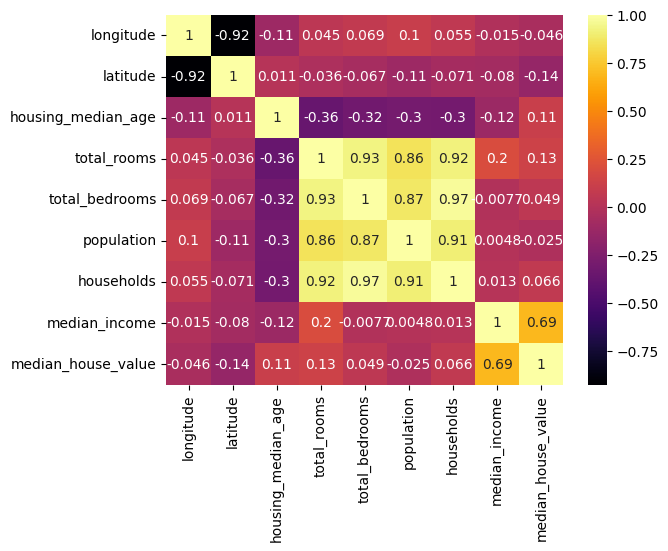

In [432]:
# Plotting the heatmap of the correlation
sns.heatmap(corr, annot = True, cmap='inferno')


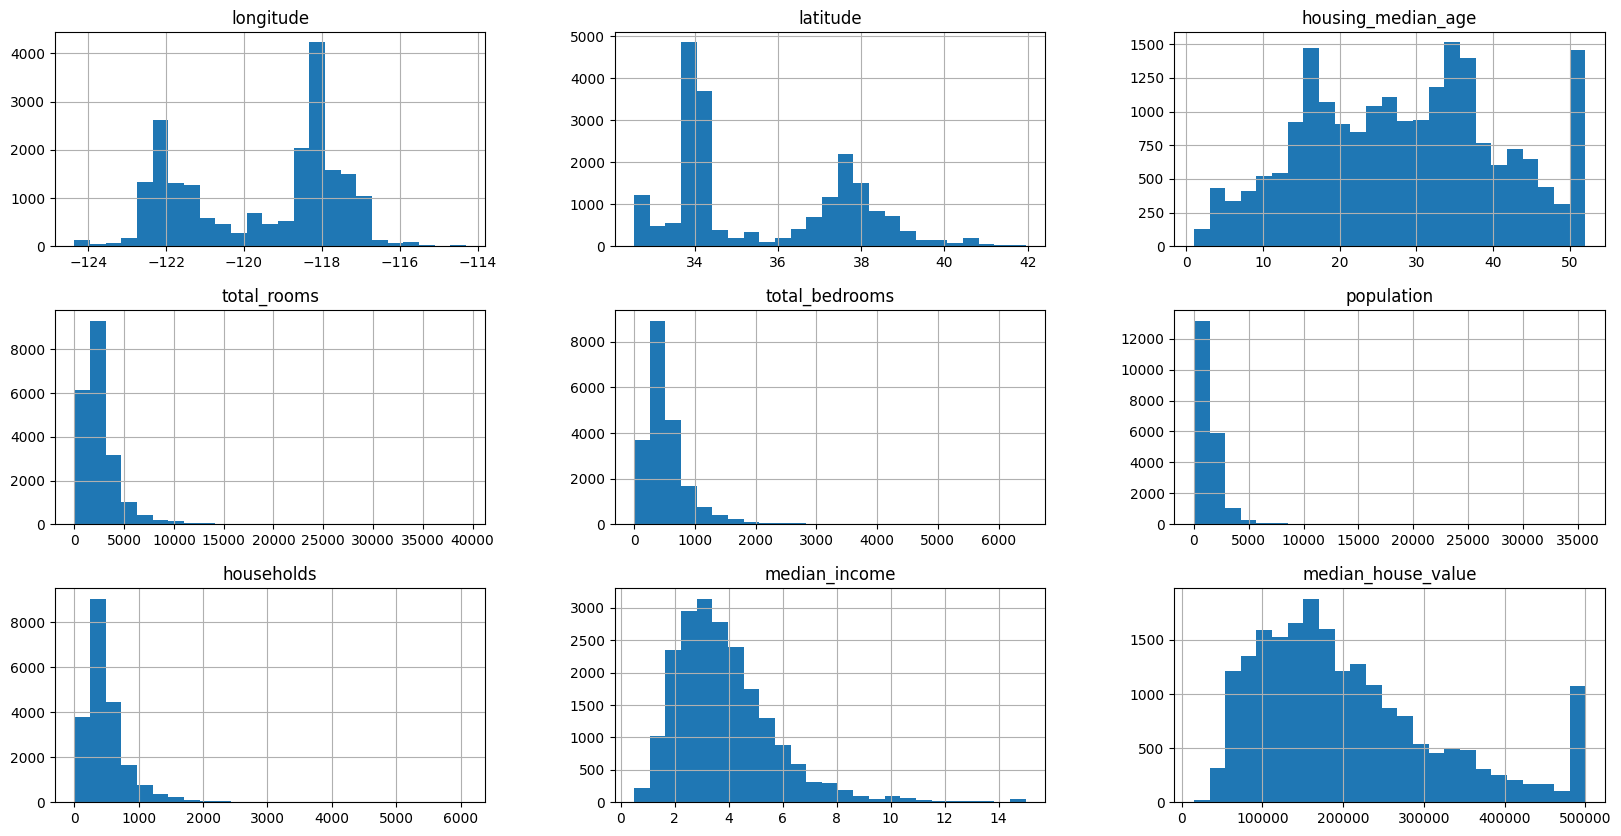

In [433]:
# To plot the histogram of all the columns with numerical values 
df.hist(bins=25,figsize=(20,10));

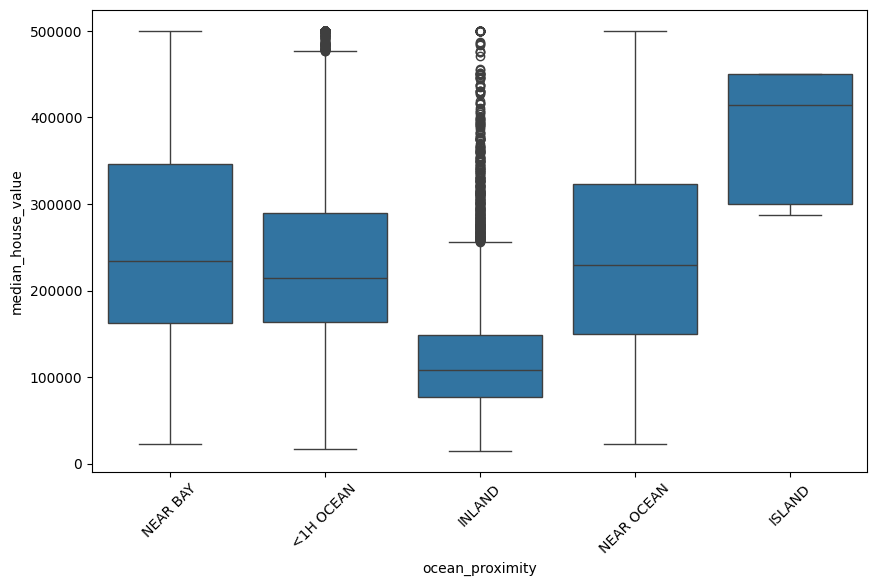

 
 Overall,the box plot suggests a positive correlation between ocean proximity and median house price in California. This means houses closer to the ocean tend to be more expensive.


In [434]:
# To plot the boxplot of median_house_value to ocean_proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ocean_proximity'],y=df['median_house_value'])
plt.xticks(rotation=45)
plt.show()
print(" \n Overall,the box plot suggests a positive correlation between ocean proximity and median house price in California. This means houses closer to the ocean tend to be more expensive.")


 The scatter plot provides a visual representation of how median house value varies across locations


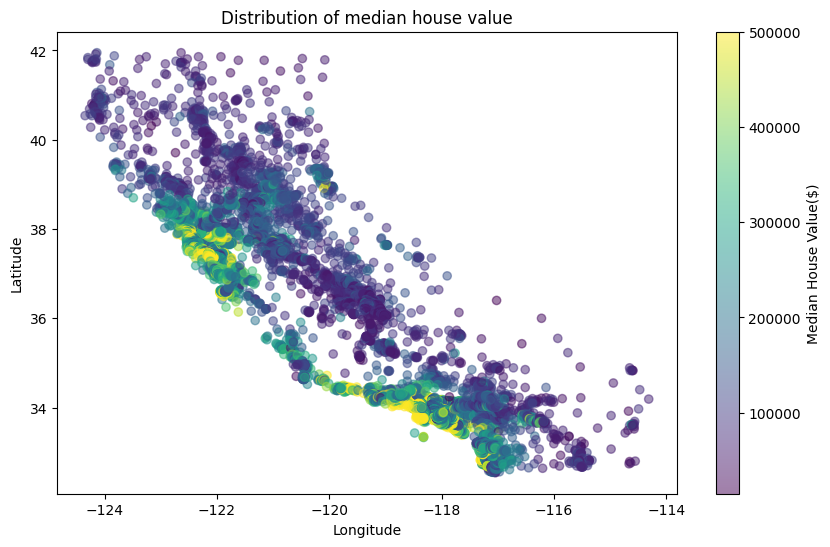

In [435]:
# To plot the scatterplot how the latitude and longitude affect the mean_house _value
plt.figure(figsize = (10,6))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],cmap = 'viridis',alpha = 0.5)
plt.colorbar(label = 'Median House Value($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of median house value')
plt.show
print("\n The scatter plot provides a visual representation of how median house value varies across locations")

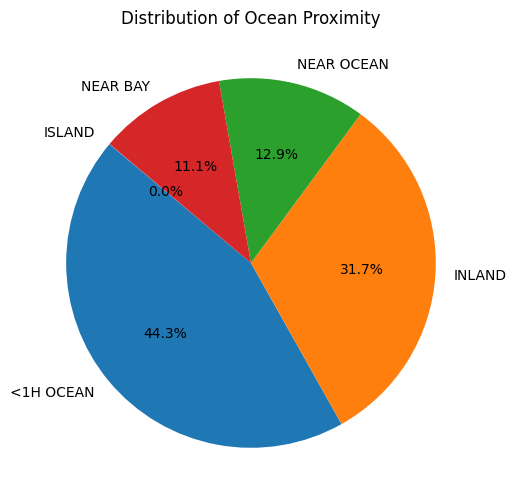

In [436]:
ocean_proximity_counts = df['ocean_proximity'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(ocean_proximity_counts, labels=ocean_proximity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ocean Proximity')
plt.show()

# Model Building
---

In [437]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [438]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [439]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']

In [440]:
X = df[features]
y = df["median_house_value"]

In [441]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state = 42,shuffle=True)

In [442]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [443]:
y_train

7061     193800.0
14689    169700.0
17323    259800.0
10056    136100.0
15750    500001.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 14448, dtype: float64

# Linear Regression Model
---

In [444]:
lr_with_intercept = LinearRegression(fit_intercept=True)

In [445]:
lr_with_intercept.fit(X_train,y_train)
y_pred_with = lr_with_intercept.predict(X_test)

In [446]:
mean_absolute_error(y_test,y_pred_with)

51066.16379284016

In [447]:
r2_score(y_test,y_pred_with)

0.6303305249297744

In [459]:
root_mean_squared_error(y_test,y_pred_with)

69656.73066288483

# Hyperparameter Tuning and Model Evaluation
---

## A. Scaling the data

In [448]:
lr_with_intercept.fit(scaler.fit_transform(X_train),y_train)

LinearRegression()

In [449]:
y_pred_intercept_scaler = lr_with_intercept.predict(scaler.transform(X_test))

In [450]:
r2_score(y_test,y_pred_intercept_scaler)

0.6303305249297748

In [458]:
root_mean_squared_error(y_test,y_pred_intercept_scaler)

69656.73066288482

## B. Linear Regression without intercept


In [451]:

lr_without_intercept = LinearRegression(fit_intercept=False)


In [452]:
lr_without_intercept.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [455]:
y_pred_without_intercept=model.predict(X_test)

In [456]:
r2_score(y_test,y_pred_without_intercept)

0.5760098043072304

In [457]:
root_mean_squared_error(y_test,y_pred_without_intercept)

74599.20489969103

# Evaluation Metrics:
---

## Model 1
### Linear Regression with intercept

In [464]:
print("The R2 score for the model 1 is :" ,r2_score(y_test,y_pred_with)*100)
print("The Root Mean Square error for the model 1 is :" ,root_mean_squared_error(y_test,y_pred_with))

The R2 score for the model 1 is : 63.03305249297744
The Root Mean Square error for the model 1 is : 69656.73066288483


# Model 2
## Linear Regression with intercept and scalling the training data

In [467]:
print("The R2 score for the model 2 is :" ,r2_score(y_test,y_pred_intercept_scaler)*100)
print("The Root Mean Square error for the model 2 is :" ,root_mean_squared_error(y_test,y_pred_intercept_scaler))

The R2 score for the model 2 is : 63.03305249297748
The Root Mean Square error for the model 2 is : 69656.73066288482


# Model 3
## Linear Regression without intercept

In [468]:
print("The R2 score for the model 2 is :" ,r2_score(y_test,y_pred_without_intercept)*100)
print("The Root Mean Square error for the model 2 is :" ,root_mean_squared_error(y_test,y_pred_without_intercept))

The R2 score for the model 2 is : 57.600980430723034
The Root Mean Square error for the model 2 is : 74599.20489969103


# Since comparing all the model(1,2,3) ,the model 2 with intercept and scalling will be deployed as it have greater R2 score compare to all other model

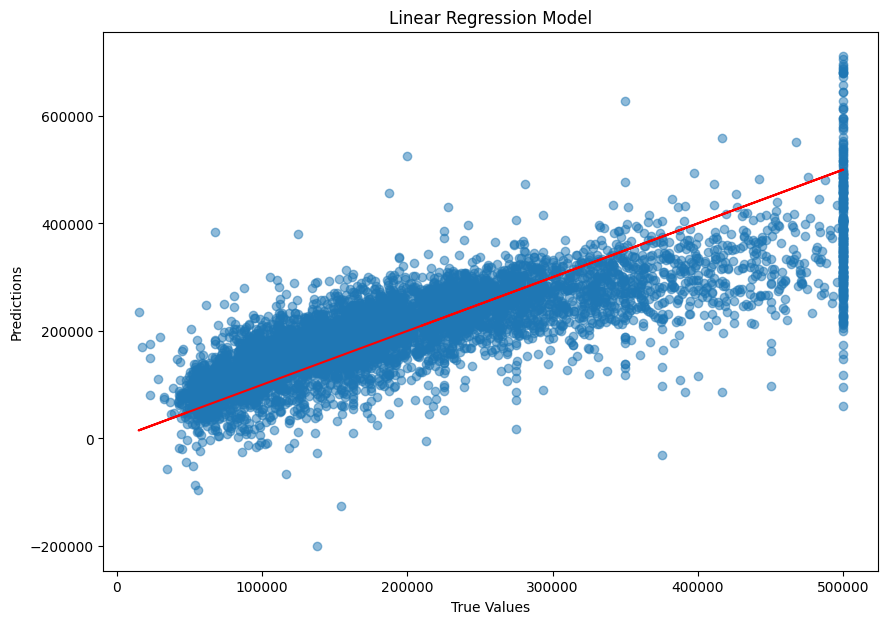

In [470]:
# Plotting the best fit line for model 2
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_intercept_scaler, alpha=0.5)
plt.plot(y_test, y_test, color='red') 
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model')
plt.show()

# Interpretation
---
## The scatter plot shows a moderately good fit between the predicted values (Y-axis) and the actual values (X-axis). There's a positive trend, but data points scatter around the line indicating some deviations.
## Essentially, the distance between a data point and the regression line tells you how accurate the model's prediction was for that specific house.